# Leitor ocr com pytesseract

# Instalação das Bibliotecas

In [1]:
!pip install pytesseract
!pip install opencv-python

You should consider upgrading via the 'C:\Users\cinth\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cinth\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pytesseract
import cv2
from matplotlib import pyplot as plt 
import os
from PIL import Image
import numpy as np
import re
import copy

- Utilizo o filtro de imagem em escala de cinza (gray) e depois para: cv2.THRESH_BINARY | cv2.THRESH_OTSU.

In [3]:
image = cv2.imread('Rg_fake.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
filename = "{}.png".format(os.getpid())
cv2.imwrite(filename,gray)

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

text = pytesseract.image_to_string(Image.open(filename), lang='por')
print(text)
os.remove(filename)

NADA EM TODO O TERATERIO RATIORA

GERA 48.151.623-42 4E | BlitS£ o 21/DEZ/2012
“ME DANIEL COELHO DA COSTA

muucao id

ROSA COELHO DA COSTA
EDIVALDO DA COSTA *

natura mao » ora De nasciuento

SÃO PAULO - SP 19/DEZ/1980

oc omut» SÃO PAULO - SP
xsooogonoconcnenanenna
cm CARTÓRIO XKKKKNOIDOUK KH
342.002.171-42
ASsmarura go pastor
LEME > VE DEZENA




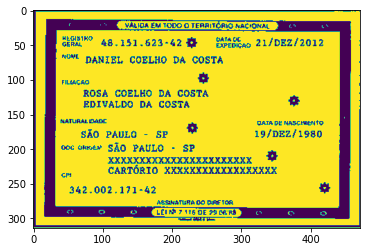

In [4]:
plt.imshow(gray)

- Pytesseract retorna uma string, em contrapartida o Paddle_ocr retorna uma lista.
- A vantagem é que as strings estão ordenadas em linhas, de acordo com a imagem, então proporciona maior facilidade para filtrar as informações.

In [5]:
print(type(text))

<class 'str'>


- Regex para filtrar somente as letras A-Z.

In [6]:
print(re.sub(r'[^\W{A-Z}]', '', text))

NADA EM TODO O TERATERIO RATIORA

GERA ..- E | BS£  /DEZ/
“ME DANIEL COELHO DA COSTA

 

ROSA COELHO DA COSTA
EDIVALDO DA COSTA *

  »  D 

SO PAULO - SP /DEZ/

 » SO PAULO - SP

 CARTRIO XKKKKNOIDOUK KH
..-
AS  
LEME > VE DEZENA




- Código para abrir webcam a partir um dispositivo interno ou externo.
- cv2.rectangle para desenhar um retângulo na imagem, a espessura e a cor da linha.
- cv2.putText para inserir um texto na imagem da camera.
- cv2.waitKey(1) == ord('p'): para destruia a janela quando for pressionado a tecla p do teclado.

In [15]:
def nothing(x):
    pass

cam = cv2.VideoCapture(1)
frame = None
margin = 30

f_h = round(cam.get(cv2.CAP_PROP_FRAME_HEIGHT ))
f_w = round(cam.get(cv2.CAP_PROP_FRAME_WIDTH ))

scale_percent = 1.5 # percent of original size
s_w = int(f_w * scale_percent)
s_h = int(f_h * scale_percent)
dim = (s_w, s_h)

r_h = round(s_h - s_h * 0.1)
r_w = round(1.4 * r_h)

x_r = s_w - r_w
y_r = s_h - r_h

rect_ext = [(x_r, y_r), (r_w, r_h)]
rect_int = [(x_r+margin, y_r+margin), (r_w - margin, r_h - margin)]

while True:
     
    check,frame=cam.read()
    
    resized = cv2.resize(copy.deepcopy(frame), dim, interpolation = cv2.INTER_AREA)
    hsv = cv2.cvtColor(resized,cv2.COLOR_BGR2HSV)

    cv2.rectangle(resized, rect_ext[0], rect_ext[1], (255, 0, 0) , 2)
    cv2.rectangle(resized, rect_int[0], rect_int[1], (0, 0, 255) , 2)
    cv2.putText(resized,'**Focalize o Documento**',(50,50), cv2.FONT_HERSHEY_COMPLEX, 1,(0, 0, 255),1)

    img=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)

    mask = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 7, 4)
    cv2.imshow('Frame',resized)
    cv2.imshow('Mask',mask)
    
    if cv2.waitKey(1) == ord('p'):
            break

cam.release()
cv2.destroyAllWindows()


- Após pressionar a tecla p, o frame é armazenado na variavel "mask"
- Crop recorta a borda interna do documento.
- Plotando a imagem, para exemplificar a qualidade da imagem filtrada com os contornos bem definidos.

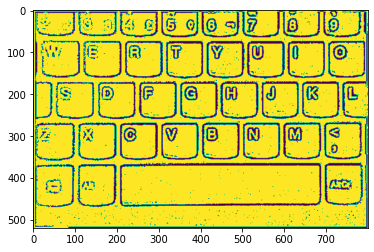

In [16]:
crop = mask[100:620,80:880]
plt.imshow(crop)

- Código para passar o ocr pytesseract na imagem, nesse exemplo, utilizei a imagem da tela do pc, mas o resultado é bem melhor quando está impresso no papel.

In [ ]:
filename_1 = "{}.png".format(os.getpid())
cv2.imwrite(filename_1,crop)

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

text_1 = pytesseract.image_to_string(Image.open(filename), lang='por')
print(text_1)

- Código com trackbars para controle da saturação das cores durante a execução da câmera.

In [20]:
def nothing(x):
    pass

cam = cv2.VideoCapture(1)
frame = None
margin = 30

f_h = round(cam.get(cv2.CAP_PROP_FRAME_HEIGHT ))
f_w = round(cam.get(cv2.CAP_PROP_FRAME_WIDTH ))

scale_percent = 1.5 # percent of original size
s_w = int(f_w * scale_percent)
s_h = int(f_h * scale_percent)
dim = (s_w, s_h)

r_h = round(s_h - s_h * 0.1)
r_w = round(1.4 * r_h)

x_r = s_w - r_w
y_r = s_h - r_h

rect_ext = [(x_r, y_r), (r_w, r_h)]
rect_int = [(x_r+margin, y_r+margin), (r_w - margin, r_h - margin)]

cv2.namedWindow('Trackbar')

cv2.createTrackbar('L-H','Trackbar',0,255,nothing)
cv2.createTrackbar('L-S','Trackbar',0,255,nothing)
cv2.createTrackbar('L-V','Trackbar',113,180,nothing)
cv2.createTrackbar('U-H','Trackbar',164,255,nothing)
cv2.createTrackbar('U-S','Trackbar',93,255,nothing)
cv2.createTrackbar('U-V','Trackbar',180,180,nothing)

while True:
     
    check,frame=cam.read()
    
    resized = cv2.resize(copy.deepcopy(frame), dim, interpolation = cv2.INTER_AREA)
    hsv = cv2.cvtColor(resized,cv2.COLOR_BGR2HSV)

    cv2.rectangle(resized, rect_ext[0], rect_ext[1], (255, 0, 0) , 2)
    cv2.rectangle(resized, rect_int[0], rect_int[1], (0, 0, 255) , 2)
    cv2.putText(resized,'*Centralize a frente o documento aqui*',(50,50), cv2.FONT_HERSHEY_COMPLEX, 1,(0, 0, 255),1)


    #trackbars to find the mask
    l_h = cv2.getTrackbarPos('L-H','Trackbar')
    l_s = cv2.getTrackbarPos('L-S','Trackbar') #2
    l_v = cv2.getTrackbarPos('L-V','Trackbar') #125
    u_h = cv2.getTrackbarPos('U-H','Trackbar') #204
    u_s = cv2.getTrackbarPos('U-S','Trackbar') #118
    u_v = cv2.getTrackbarPos('U-V','Trackbar') #180

    lower_red = np.array([l_h,l_s,l_v])
    upper_red = np.array([u_h,u_s,u_v])
    
    mask = cv2.inRange(hsv, lower_red, upper_red)
    
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        
        approx = cv2.approxPolyDP(cnt, 0.02*cv2.arcLength(cnt, True), True)
          
    cv2.imshow('Frame',resized)
    cv2.imshow('Mask',mask)

    key=cv2.waitKey(1)
    if cv2.waitKey(1) == ord('p'):
        break
cam.release()
cv2.destroyAllWindows()

- Código para utilizar câmera no Android:
    
No andoid: 
* Conectar usb
* Abrir aplicativo ip webcam
* Ir en configurações
* Pesquisar tethering USB
* Habilitar Tethering USB
No computador:
* Tecla Windows
* Pesquisar painel de controle
* Clicar em rede e internet
* Central de rede e compartilhamento
* Em redes ativas, existirá uma rede pública, ethernet # a direita
* Clicar em detalhes e anotar o endereço do gateway padrão ipv4 deixar :8080/video
exemplo:'http://192.168.145.32:8080/video'
* No Aplicativo clicar em start server
'http://192.168.145.32:8080/video'

In [22]:
def get_frame():
    cam = cv2.VideoCapture(0)#'http://192.168.145.32:8080/video'

    frame = None
    margin = 30

    f_h = round(cam.get(cv2.CAP_PROP_FRAME_HEIGHT ))
    f_w = round(cam.get(cv2.CAP_PROP_FRAME_WIDTH ))

    scale_percent = 0.3 # percent of original size
    s_w = int(f_w * scale_percent)
    s_h = int(f_h * scale_percent)
    dim = (s_w, s_h)

    r_h = round(s_h - s_h * 0.1)
    r_w = round(1.6 * r_h)

    x_r = s_w - r_w
    y_r = s_h - r_h

    rect_ext = [(x_r, y_r), (r_w, r_h)]
    rect_int = [(x_r+margin, y_r+margin), (r_w - margin, r_h - margin)]

    while True:
        check, frame = cam.read()

        resized = cv2.resize(copy.deepcopy(frame), dim, interpolation = cv2.INTER_AREA)

        cv2.rectangle(resized, rect_ext[0], rect_ext[1],(255, 0, 0) , 2)
        cv2.rectangle(resized, rect_int[0], rect_int[1], (0, 0, 255) , 2)
        cv2.putText(resized,'*Centralize a frente o documento aqui*',(50,50), cv2.FONT_HERSHEY_COMPLEX, 1,(0, 0, 255),1)

        cv2.imshow('frame', resized)

        if cv2.waitKey(1) == ord('p'):
            break

    cam.release()
    cv2.destroyAllWindows()
    
    return frame